# Домашнее задание к лекции "Визуализация данных"
## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

### Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.
### Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
не менее двух визуализаций должны быть интерактивными.

## Пояснения к датасету:
В качестве данных взяты приходы на склад розничных продуковых сетей X, Y, Z  в конкретно взятом регионе/зоне за период с 2 по 13 неделю N года. Разбивка вплоть до товара + товарный классификатор. Опционально есть поставщик. Важное примечание: сети обладают примерно одним и тем же товарным разнообразием.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
df = pd.read_excel('dataset.xlsx')
df.head()

,network,week_num,Level_2,Level_4,Contractor,Product,Code_,Count,Incoming
0,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ","ООО ""Лиммэн""",Гот.зав.Kosmostars 325г Медовый,23881,2.0,286.16
1,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ","ООО ""Лиммэн""",Гот.зав.Nesquik DUO 250г Шоколадные шарики,84403,18.0,1209.60
2,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Предприятие АЛИДИ ООО,Гот.зав.Nesquik 250г Кальций шоколадные шарики,11185,14.0,940.80
3,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Предприятие АЛИДИ ООО,Гот.зав.Nesquik DUO 250г Шоколадные шарики,84403,12.0,806.40
4,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Продсоюзагро ООО,Гот.зав.Любятово 250г Подушечки с шокол.начинкой,35898,78.0,4293.12


In [19]:
df['price'] = df['Incoming']/df['Count']
df.head()

,network,week_num,Level_2,Level_4,Contractor,Product,Code_,Count,Incoming,price
0,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ","ООО ""Лиммэн""",Гот.зав.Kosmostars 325г Медовый,23881,2.0,286.16,143.08
1,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ","ООО ""Лиммэн""",Гот.зав.Nesquik DUO 250г Шоколадные шарики,84403,18.0,1209.60,67.20
2,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Предприятие АЛИДИ ООО,Гот.зав.Nesquik 250г Кальций шоколадные шарики,11185,14.0,940.80,67.20
3,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Предприятие АЛИДИ ООО,Гот.зав.Nesquik DUO 250г Шоколадные шарики,84403,12.0,806.40,67.20
4,X,2,БАКАЛЕЯ,"ГОТ ЗАВТРАКИ, ПОДУШЕЧКИ, КОЛЕЧКИ",Продсоюзагро ООО,Гот.зав.Любятово 250г Подушечки с шокол.начинкой,35898,78.0,4293.12,55.04


In [20]:
df_plot = df.pivot_table(columns = 'network', values = 'Incoming', aggfunc = 'sum', fill_value = 0)
df_plot.head()

network,X,Y,Z
Incoming,7.662598e+08,7.965926e+08,8.232751e+08


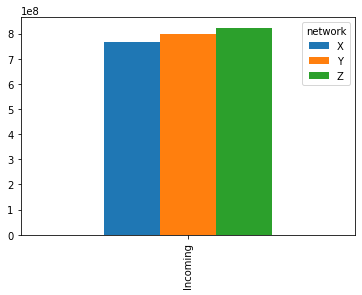

In [21]:
df_plot.plot(kind = 'bar')

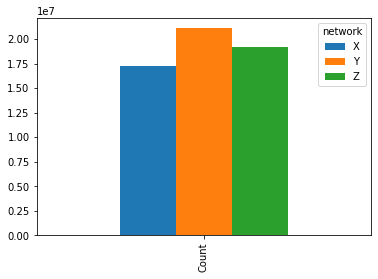

In [22]:
df_plot2 = df.pivot_table(columns = 'network', values = 'Count', aggfunc = 'sum', fill_value = 0)
df_plot2.head()
df_plot2.plot(kind = 'bar')

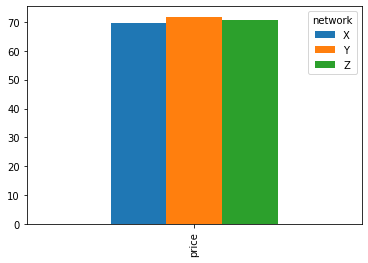

In [24]:
df_plot3 = df.pivot_table(columns = 'network', values = 'price', aggfunc = 'mean', fill_value = 0)
df_plot.head()
df_plot3.plot(kind = 'bar')

На основании первичных данных мы можем сформулировать вывод о том, что сеть X обладает наихудшими условиями по закупке товаров: об этом свидетельствуют примерно одинаковые данные по средним ценам приходов и объеме приходов в рублях, при сильно различающихся объемах продаж в натуральном выражении. То есть, мы видим что сеть X явно закупает физически меньше объема, однако, условия таковы, что за меньшую партию сеть отдает примерно те же деньги, что и другие сети. Наиболее успешной является сеть Y.

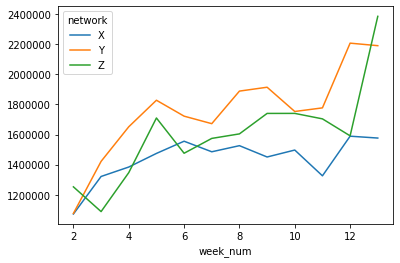

In [29]:
df_plot4 = df.pivot_table(index = 'week_num',columns = 'network', values = 'Count', aggfunc = 'sum', fill_value = 0)
df_plot4.plot()

Попробуем проанализировать динамику: на основании физических приходов мы видим явную схожесть в структуре графика между сетями X и Y. На основании этих данных, мы можем сформулировать гипотезу о том, что данные сети или более осведомлены о структуре спроса в данном регионе, или ведут примерно одинаковую политику в работе с поставщиками - с разницей лишь в непоcредственно объемах. Сеть Z, возможно, не обладает компетенциями в знании местного спроса, или ведет кардинально другую политику в отношении своих покупателей. Возможно,на основании данных 13 недели, мы можем говорить о том, что данная сеть потенциально готовится к акции, закупая бОльшее кол-во продукции при примерно одинаковых ценах (см. графики выше).
 

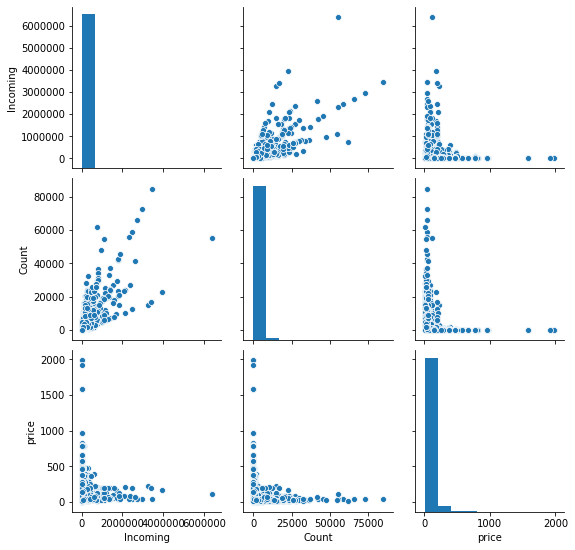

In [34]:
dfx = df.loc[df['network']=='X']
sns_plot = sns.pairplot(
    dfx[['Incoming', 'Count', 'price']])
sns_plot

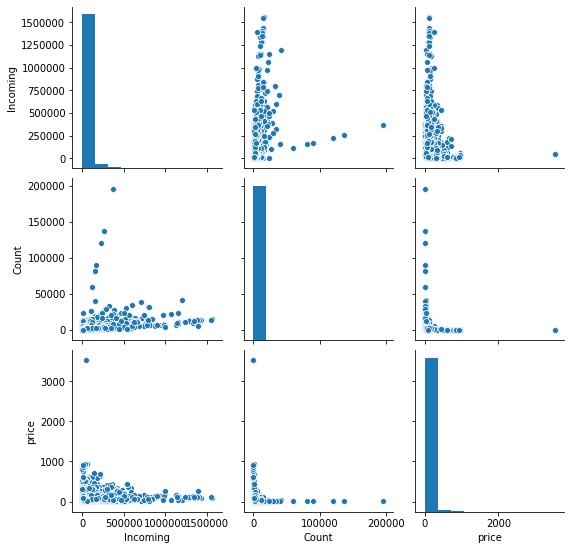

In [35]:
dfy = df.loc[df['network']=='Y']
sns_plot = sns.pairplot(
    dfy[['Incoming', 'Count', 'price']])
sns_plot

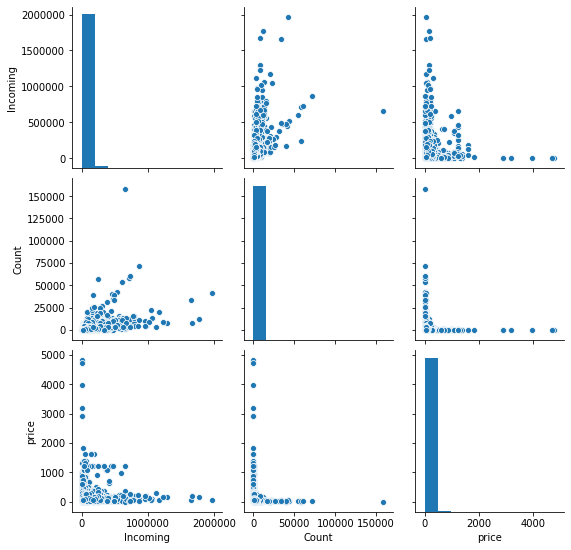

In [37]:
dfz = df.loc[df['network']=='Z']
sns_plot = sns.pairplot(
    dfz[['Incoming', 'Count', 'price']])
sns_plot

На основании более расширенного анализа, мы видим:
1. Сеть X обладает более расширенным товарным предложением, т.е. в ее ассортименте присутствуют товары с более высокой ценой,что обьясняет историю с тем, что при меньших оборотах компания примерно равна сетят Y, Z. То есть у компании более расширенное уникальное товарное предложение.\
2. Сеть Y более сосредоточена на объемах и поставляет клиентам более массовый продукт.
3. Сеть Z представляет из себя нечто среднее, т.е. у нее есть товары с достаточно высокими ценами, но в не таком большом количестве как в сети X.
При прочих равных, принимая за основу более расширенные знания о регионе в сетях X и Y, мы понимаем что сеть Z пытается обслужить усредненный интерес, тогда как сети X и Y работают на конкретных покупателей.

In [54]:
df_heat_map = df.pivot_table(index = 'Level_2',columns = 'network', values = 'Incoming', aggfunc = 'sum', fill_value = 0)
df_heat_map

network,X,Y,Z
Level_2,,,
БАКАЛЕЯ,4.025566e+07,6.259108e+07,3.969770e+07
ДЕТСКОЕ ПИТАНИЕ,1.515664e+07,3.057430e+06,1.629237e+07
ЗАМОРОЖЕННОЕ МЯСО,1.129769e+06,7.914980e+06,1.271298e+06
ЗАМОРОЖЕННЫЕ ПРОДУКТЫ,2.681047e+07,1.683210e+07,2.038810e+07
ЗДОРОВОЕ ПИТАНИЕ,1.091862e+06,2.650608e+06,2.643565e+06
КОЛБАСА И КОЛБАСНЫЕ ИЗДЕЛИЯ,4.765413e+07,6.143883e+07,2.877534e+07
КОНДИТЕРСКИЕ ИЗДЕЛИЯ,7.446846e+07,8.023288e+07,9.189973e+07
КОНСЕРВИРОВАННЫЕ ПРОДУКТЫ,1.370123e+07,2.522532e+07,1.461708e+07
КРАСОТА И ЗДОРОВЬЕ,2.289693e+07,3.594018e+07,4.419673e+07


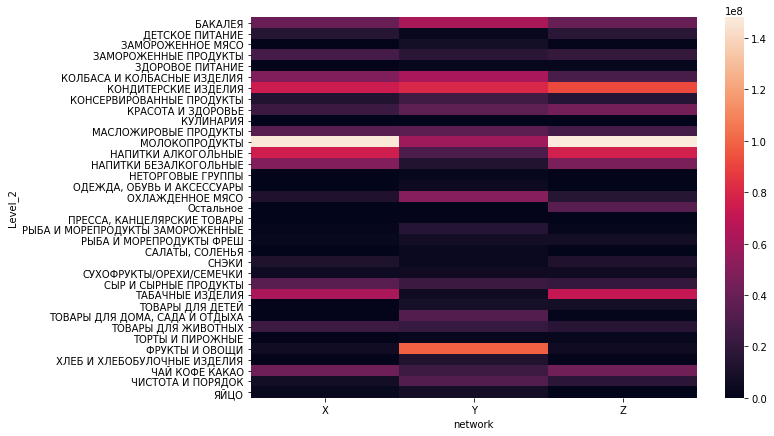

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
heat = sns.heatmap(df_heat_map)

Построим тепловую карту: на основании данных по категориям, укрупненно, мы видим следующее:
1. Сети X и Z активно закупают молокопродукты.
2. Сеть Y выгодно отличается по закупкам Фруктов и Овощей
3. Примерно одинаково все 3 сети работают с Кондитерскими изделиями.
4. Бакалея по закупкам выгодно отличается в сети Y.
5. Алкоголь в Большей степени влияет на сть X и Z.
Исходя из этого, следующие гипотезы:
1. Сети X и Z возможно работают на сиюминутных потребностях, т.к. то же самое молоко имеет короткий срок хранения
2. Сеть Y вообще не специализируется на алкоголе и имеет более выгодное сотрудничество в части продукции ФРОВ (Фрукты и Овощи)
3. Так же сеть Y имеет хорошие условие по Бакалее (крупы и пр.)
4. В регионе есть явно стабильно сильные категории - кондитерские изделия, колбаса.